Dataset Loading

In [5]:
import os
import pandas as pd

In [3]:
# Define the folder containing CSV files
folder_path = r"D:\Cyber_Assignment\iscxids2012-master\data\CSV"

# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Read and concatenate all CSV files into a single DataFrame
df = pd.concat([pd.read_csv(os.path.join(folder_path, file)) for file in csv_files], ignore_index=True)

# Display the combined DataFrame
print(df.head())



         generated            appName  totalSourceBytes  \
0  3/11/2014 18:21        Unknown_UDP             16076   
1  3/11/2014 18:21  HTTPImageTransfer               384   
2  3/11/2014 18:21                DNS               171   
3  3/11/2014 18:21  HTTPImageTransfer               384   
4  3/11/2014 18:21  HTTPImageTransfer               186   

   totalDestinationBytes  totalDestinationPackets  totalSourcePackets  \
0                      0                        0                 178   
1                      0                        0                   6   
2                    642                        4                   2   
3                      0                        0                   6   
4                    128                        2                   2   

  sourcePayloadAsBase64 sourcePayloadAsUTF destinationPayloadAsBase64  \
0                   NaN                NaN                        NaN   
1                   NaN                NaN                  

In [7]:
#Saving the merged dataset
df.to_csv("Dataset.csv")

Data Preprocessing

In [13]:
# Load the CSV file
df = pd.read_csv(r"D:\Cyber_Assignment\Dataset.csv")

# Count occurrences of each class
class_counts = df["Label"].value_counts()

# Print the counts
print(class_counts)


C:\Users\Supratim\AppData\Local\Temp\ipykernel_416\3241797524.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\Cyber_Assignment\Dataset.csv")


Label
Normal    2002747
Attack      68910
Name: count, dtype: int64


In [21]:
#Finding Duplicate Rows
df.duplicated().sum()

0

In [25]:
#Description of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2071657.0,1.035828e+06,5.980360e+05,0.0,517914.0,1035828.0,1553742.0,2.071656e+06
totalSourceBytes,2071657.0,2.460947e+03,7.517785e+05,0.0,256.0,442.0,845.0,7.632776e+08
totalDestinationBytes,2071657.0,3.448911e+04,1.187177e+06,0.0,419.0,1177.0,7338.0,1.254005e+09
totalDestinationPackets,2071657.0,3.030068e+01,9.834982e+02,0.0,2.0,5.0,11.0,8.722240e+05
totalSourcePackets,2071657.0,1.984019e+01,6.679018e+02,0.0,3.0,6.0,10.0,5.147940e+05
sourcePort,2071657.0,1.413759e+04,2.014297e+04,0.0,2302.0,3744.0,16993.0,6.553500e+04
destinationPort,2071657.0,1.882091e+03,8.623280e+03,0.0,80.0,80.0,80.0,6.553500e+04


In [29]:
min_count = min(class_counts.min(), 10000 // len(class_counts))  # Ensuring equal class distribution

# Sample equal number of rows for each class
df_balanced = df.groupby("Label").apply(lambda x: x.sample(n=min_count, random_state=42)).reset_index(drop=True)

# Save or display
print(df_balanced["Label"].value_counts())  # Verify class balance
df_balanced.to_csv("balanced_dataset.csv", index=False)  # Save if needed


C:\Users\Supratim\AppData\Local\Temp\ipykernel_416\349870182.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby("Label").apply(lambda x: x.sample(n=min_count, random_state=42)).reset_index(drop=True)


Label
Attack    5000
Normal    5000
Name: count, dtype: int64


In [7]:
df_balanced=pd.read_csv("balanced_dataset.csv")

In [9]:
#Dropping Unwanted Columns
df_balanced.drop(columns=["Unnamed: 0","generated","startDateTime", "stopDateTime",], axis= 1,  inplace=True)


In [11]:
df_balanced

,appName,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,sourcePayloadAsBase64,sourcePayloadAsUTF,destinationPayloadAsBase64,destinationPayloadAsUTF,direction,sourceTCPFlagsDescription,destinationTCPFlagsDescription,source,protocolName,sourcePort,destination,destinationPort,Label
0,HTTPWeb,7745,160724,154,63,R0VUIC8gSFRUUC8xLjENCkhvc3Q6IDE5Mi4xNjguNS4xMj...,GET / HTTP/1.1Host: 192.168.5.122GET / HTTP/1....,SFRUUC8xLjEgMjAwIE9LDQpEYXRlOiBUdWUsIDE1IEp1bi...,"HTTP/1.1 200 OKDate: Tue, 15 Jun 2010 19:54:06...",L2L,"F,S,P,A","F,S,P,A",192.168.2.113,tcp_ip,3233,192.168.5.122,80,Attack
1,HTTPWeb,10112,163972,210,105,R0VUIC8gSFRUUC8xLjENCkhvc3Q6IDE5Mi4xNjguNS4xMj...,GET / HTTP/1.1Host: 192.168.5.122GET / HTTP/1....,SFRUUC8xLjEgMjAwIE9LDQpEYXRlOiBUdWUsIDE1IEp1bi...,"HTTP/1.1 200 OKDate: Tue, 15 Jun 2010 20:06:51...",L2L,"F,S,P,A","F,S,P,A",192.168.1.103,tcp_ip,1406,192.168.5.122,80,Attack
2,HTTPWeb,7842,160724,154,64,R0VUIC8gSFRUUC8xLjENCkhvc3Q6IDE5Mi4xNjguNS4xMj...,GET / HTTP/1.1Host: 192.168.5.122GET / HTTP/1....,SFRUUC8xLjEgMjAwIE9LDQpEYXRlOiBUdWUsIDE1IEp1bi...,"HTTP/1.1 200 OKDate: Tue, 15 Jun 2010 19:46:29...",L2L,"F,S,P,A","F,S,P,A",192.168.2.113,tcp_ip,1469,192.168.5.122,80,Attack
3,SSH,1408,3185,12,12,NaN,NaN,NaN,NaN,R2L,"F,S,P,A","F,S,P,A",131.202.243.90,tcp_ip,7509,192.168.5.122,22,Attack
4,HTTPWeb,7842,160724,154,64,R0VUIC8gSFRUUC8xLjENCkhvc3Q6IDE5Mi4xNjguNS4xMj...,GET / HTTP/1.1Host: 192.168.5.122GET / HTTP/1....,SFRUUC8xLjEgMjAwIE9LDQpEYXRlOiBUdWUsIDE1IEp1bi...,"HTTP/1.1 200 OKDate: Tue, 15 Jun 2010 19:55:27...",L2L,"F,S,P,A","F,S,P,A",192.168.2.113,tcp_ip,3552,192.168.5.122,80,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,HTTPImageTransfer,1125,2966,12,11,NaN,NaN,NaN,NaN,L2R,"F,S,P,A","F,S,P,A",192.168.2.113,tcp_ip,1987,72.21.210.76,80,Normal
9996,DNS,90,208,1,1,Sw0BAAABAAAAAAABAmNhAnJkBXlhaG9vA2NvbQAAAQABAA...,K....ca.rd.yahoo.com..)..,Sw2BgAABAAIAAgADAmNhAnJkBXlhaG9vA2NvbQAAAQABwA...,K.......ca.rd.yahoo.com........frontpage.ca.fy...,L2R,NaN,NaN,192.168.5.122,udp_ip,13278,198.164.30.2,53,Normal
9997,HTTPImageTransfer,477,2571,6,6,NaN,NaN,NaN,NaN,L2R,"F,S,P,A","F,S,P,A",192.168.2.109,tcp_ip,3249,95.211.98.14,80,Normal
9998,HTTPImageTransfer,285,1116,2,3,NaN,NaN,NaN,NaN,L2R,"F,P,A","F,P,A",192.168.1.102,tcp_ip,2588,64.74.98.80,80,Normal


In [79]:
df_balanced.isnull().sum()

totalSourceBytes                  0
totalDestinationBytes             0
sourceTCPFlagsDescription         0
destinationTCPFlagsDescription    0
sourcePort                        0
                                 ..
direction_L2L                     0
direction_L2R                     0
direction_R2R                     0
protocolName_tcp_ip               0
destinationSubnet                 0
Length: 93, dtype: int64

In [17]:
#Changing Nominal Datapoints
df_balanced = pd.get_dummies(df_balanced, columns=['appName','direction','protocolName'])

In [19]:
df_balanced

,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,sourcePayloadAsBase64,sourcePayloadAsUTF,destinationPayloadAsBase64,destinationPayloadAsUTF,sourceTCPFlagsDescription,destinationTCPFlagsDescription,...,appName_rlogin,appName_rsh,direction_L2L,direction_L2R,direction_R2L,direction_R2R,protocolName_icmp_ip,protocolName_igmp,protocolName_tcp_ip,protocolName_udp_ip
0,7745,160724,154,63,R0VUIC8gSFRUUC8xLjENCkhvc3Q6IDE5Mi4xNjguNS4xMj...,GET / HTTP/1.1Host: 192.168.5.122GET / HTTP/1....,SFRUUC8xLjEgMjAwIE9LDQpEYXRlOiBUdWUsIDE1IEp1bi...,"HTTP/1.1 200 OKDate: Tue, 15 Jun 2010 19:54:06...",6,6,...,False,False,True,False,False,False,False,False,True,False
1,10112,163972,210,105,R0VUIC8gSFRUUC8xLjENCkhvc3Q6IDE5Mi4xNjguNS4xMj...,GET / HTTP/1.1Host: 192.168.5.122GET / HTTP/1....,SFRUUC8xLjEgMjAwIE9LDQpEYXRlOiBUdWUsIDE1IEp1bi...,"HTTP/1.1 200 OKDate: Tue, 15 Jun 2010 20:06:51...",6,6,...,False,False,True,False,False,False,False,False,True,False
2,7842,160724,154,64,R0VUIC8gSFRUUC8xLjENCkhvc3Q6IDE5Mi4xNjguNS4xMj...,GET / HTTP/1.1Host: 192.168.5.122GET / HTTP/1....,SFRUUC8xLjEgMjAwIE9LDQpEYXRlOiBUdWUsIDE1IEp1bi...,"HTTP/1.1 200 OKDate: Tue, 15 Jun 2010 19:46:29...",6,6,...,False,False,True,False,False,False,False,False,True,False
3,1408,3185,12,12,NaN,NaN,NaN,NaN,6,6,...,False,False,False,False,True,False,False,False,True,False
4,7842,160724,154,64,R0VUIC8gSFRUUC8xLjENCkhvc3Q6IDE5Mi4xNjguNS4xMj...,GET / HTTP/1.1Host: 192.168.5.122GET / HTTP/1....,SFRUUC8xLjEgMjAwIE9LDQpEYXRlOiBUdWUsIDE1IEp1bi...,"HTTP/1.1 200 OKDate: Tue, 15 Jun 2010 19:55:27...",6,6,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1125,2966,12,11,NaN,NaN,NaN,NaN,6,6,...,False,False,False,True,False,False,False,False,True,False
9996,90,208,1,1,Sw0BAAABAAAAAAABAmNhAnJkBXlhaG9vA2NvbQAAAQABAA...,K....ca.rd.yahoo.com..)..,Sw2BgAABAAIAAgADAmNhAnJkBXlhaG9vA2NvbQAAAQABwA...,K.......ca.rd.yahoo.com........frontpage.ca.fy...,19,17,...,False,False,False,True,False,False,False,False,False,True
9997,477,2571,6,6,NaN,NaN,NaN,NaN,6,6,...,False,False,False,True,False,False,False,False,True,False
9998,285,1116,2,3,NaN,NaN,NaN,NaN,2,2,...,False,False,False,True,False,False,False,False,True,False


In [13]:
#Changing Ordinal Datapoints
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_balanced['sourceTCPFlagsDescription'] = le.fit_transform(df_balanced['sourceTCPFlagsDescription'])
df_balanced['destinationTCPFlagsDescription'] = le.fit_transform(df_balanced['destinationTCPFlagsDescription'])


In [14]:
df_balanced

,appName,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,sourcePayloadAsBase64,sourcePayloadAsUTF,destinationPayloadAsBase64,destinationPayloadAsUTF,direction,sourceTCPFlagsDescription,destinationTCPFlagsDescription,source,protocolName,sourcePort,destination,destinationPort,Label
0,HTTPWeb,7745,160724,154,63,R0VUIC8gSFRUUC8xLjENCkhvc3Q6IDE5Mi4xNjguNS4xMj...,GET / HTTP/1.1Host: 192.168.5.122GET / HTTP/1....,SFRUUC8xLjEgMjAwIE9LDQpEYXRlOiBUdWUsIDE1IEp1bi...,"HTTP/1.1 200 OKDate: Tue, 15 Jun 2010 19:54:06...",L2L,6,6,192.168.2.113,tcp_ip,3233,192.168.5.122,80,Attack
1,HTTPWeb,10112,163972,210,105,R0VUIC8gSFRUUC8xLjENCkhvc3Q6IDE5Mi4xNjguNS4xMj...,GET / HTTP/1.1Host: 192.168.5.122GET / HTTP/1....,SFRUUC8xLjEgMjAwIE9LDQpEYXRlOiBUdWUsIDE1IEp1bi...,"HTTP/1.1 200 OKDate: Tue, 15 Jun 2010 20:06:51...",L2L,6,6,192.168.1.103,tcp_ip,1406,192.168.5.122,80,Attack
2,HTTPWeb,7842,160724,154,64,R0VUIC8gSFRUUC8xLjENCkhvc3Q6IDE5Mi4xNjguNS4xMj...,GET / HTTP/1.1Host: 192.168.5.122GET / HTTP/1....,SFRUUC8xLjEgMjAwIE9LDQpEYXRlOiBUdWUsIDE1IEp1bi...,"HTTP/1.1 200 OKDate: Tue, 15 Jun 2010 19:46:29...",L2L,6,6,192.168.2.113,tcp_ip,1469,192.168.5.122,80,Attack
3,SSH,1408,3185,12,12,NaN,NaN,NaN,NaN,R2L,6,6,131.202.243.90,tcp_ip,7509,192.168.5.122,22,Attack
4,HTTPWeb,7842,160724,154,64,R0VUIC8gSFRUUC8xLjENCkhvc3Q6IDE5Mi4xNjguNS4xMj...,GET / HTTP/1.1Host: 192.168.5.122GET / HTTP/1....,SFRUUC8xLjEgMjAwIE9LDQpEYXRlOiBUdWUsIDE1IEp1bi...,"HTTP/1.1 200 OKDate: Tue, 15 Jun 2010 19:55:27...",L2L,6,6,192.168.2.113,tcp_ip,3552,192.168.5.122,80,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,HTTPImageTransfer,1125,2966,12,11,NaN,NaN,NaN,NaN,L2R,6,6,192.168.2.113,tcp_ip,1987,72.21.210.76,80,Normal
9996,DNS,90,208,1,1,Sw0BAAABAAAAAAABAmNhAnJkBXlhaG9vA2NvbQAAAQABAA...,K....ca.rd.yahoo.com..)..,Sw2BgAABAAIAAgADAmNhAnJkBXlhaG9vA2NvbQAAAQABwA...,K.......ca.rd.yahoo.com........frontpage.ca.fy...,L2R,19,17,192.168.5.122,udp_ip,13278,198.164.30.2,53,Normal
9997,HTTPImageTransfer,477,2571,6,6,NaN,NaN,NaN,NaN,L2R,6,6,192.168.2.109,tcp_ip,3249,95.211.98.14,80,Normal
9998,HTTPImageTransfer,285,1116,2,3,NaN,NaN,NaN,NaN,L2R,2,2,192.168.1.102,tcp_ip,2588,64.74.98.80,80,Normal


In [21]:
print(df_balanced[['sourcePayloadAsBase64', 'sourcePayloadAsUTF',
          'destinationPayloadAsBase64', 'destinationPayloadAsUTF']].isnull().sum())


sourcePayloadAsBase64         4907
sourcePayloadAsUTF            5144
destinationPayloadAsBase64    5142
destinationPayloadAsUTF       5143
dtype: int64


In [23]:
df_balanced.drop(columns=['sourcePayloadAsBase64', 'sourcePayloadAsUTF',
          'destinationPayloadAsBase64', 'destinationPayloadAsUTF'], axis= 1,  inplace=True)

In [25]:
#Converting the IP Addresses from string to numeric
df_balanced["sourceSubnet"] = df_balanced["source"].apply(lambda ip: ".".join(ip.split(".")[:3]))  # e.g., "192.168.1"
df_balanced["destinationSubnet"] = df_balanced["destination"].apply(lambda ip: ".".join(ip.split(".")[:3]))



In [27]:
df_balanced.drop(columns=["source","destination"], axis=1, inplace=True)

In [29]:
df_balanced

,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,sourceTCPFlagsDescription,destinationTCPFlagsDescription,sourcePort,destinationPort,Label,appName_AOL-ICQ,...,direction_L2L,direction_L2R,direction_R2L,direction_R2R,protocolName_icmp_ip,protocolName_igmp,protocolName_tcp_ip,protocolName_udp_ip,sourceSubnet,destinationSubnet
0,7745,160724,154,63,6,6,3233,80,Attack,False,...,True,False,False,False,False,False,True,False,192.168.2,192.168.5
1,10112,163972,210,105,6,6,1406,80,Attack,False,...,True,False,False,False,False,False,True,False,192.168.1,192.168.5
2,7842,160724,154,64,6,6,1469,80,Attack,False,...,True,False,False,False,False,False,True,False,192.168.2,192.168.5
3,1408,3185,12,12,6,6,7509,22,Attack,False,...,False,False,True,False,False,False,True,False,131.202.243,192.168.5
4,7842,160724,154,64,6,6,3552,80,Attack,False,...,True,False,False,False,False,False,True,False,192.168.2,192.168.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1125,2966,12,11,6,6,1987,80,Normal,False,...,False,True,False,False,False,False,True,False,192.168.2,72.21.210
9996,90,208,1,1,19,17,13278,53,Normal,False,...,False,True,False,False,False,False,False,True,192.168.5,198.164.30
9997,477,2571,6,6,6,6,3249,80,Normal,False,...,False,True,False,False,False,False,True,False,192.168.2,95.211.98
9998,285,1116,2,3,2,2,2588,80,Normal,False,...,False,True,False,False,False,False,True,False,192.168.1,64.74.98


In [53]:
import ipaddress

df_balanced["sourceSubnet"] = df_balanced["sourceSubnet"].apply(lambda x: int(ipaddress.IPv4Address(x + ".0")))
df_balanced["destinationSubnet"] = df_balanced["destinationSubnet"].apply(lambda x: int(ipaddress.IPv4Address(x + ".0")))


In [37]:
df_balanced["Label"] = df_balanced["Label"].apply(lambda x: 0 if x == "Normal" else 1)


In [55]:
df_balanced

,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,sourceTCPFlagsDescription,destinationTCPFlagsDescription,sourcePort,destinationPort,Label,appName_AOL-ICQ,...,direction_L2L,direction_L2R,direction_R2L,direction_R2R,protocolName_icmp_ip,protocolName_igmp,protocolName_tcp_ip,protocolName_udp_ip,sourceSubnet,destinationSubnet
0,7745,160724,154,63,6,6,3233,80,1,False,...,True,False,False,False,False,False,True,False,3232236032,3232236800
1,10112,163972,210,105,6,6,1406,80,1,False,...,True,False,False,False,False,False,True,False,3232235776,3232236800
2,7842,160724,154,64,6,6,1469,80,1,False,...,True,False,False,False,False,False,True,False,3232236032,3232236800
3,1408,3185,12,12,6,6,7509,22,1,False,...,False,False,True,False,False,False,True,False,2211115776,3232236800
4,7842,160724,154,64,6,6,3552,80,1,False,...,True,False,False,False,False,False,True,False,3232236032,3232236800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1125,2966,12,11,6,6,1987,80,0,False,...,False,True,False,False,False,False,True,False,3232236032,1209389568
9996,90,208,1,1,19,17,13278,53,0,False,...,False,True,False,False,False,False,False,True,3232236800,3332644352
9997,477,2571,6,6,6,6,3249,80,0,False,...,False,True,False,False,False,False,True,False,3232236032,1607688704
9998,285,1116,2,3,2,2,2588,80,0,False,...,False,True,False,False,False,False,True,False,3232235776,1078616576


Feature Selection

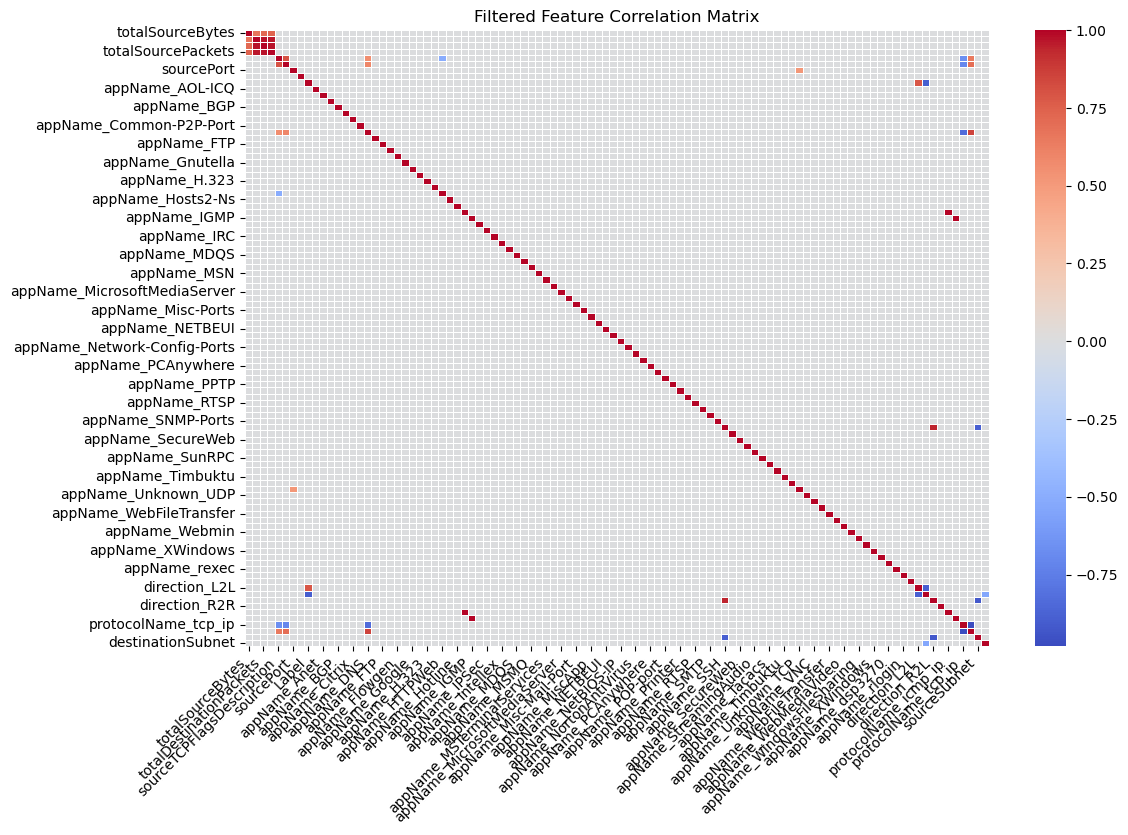

In [63]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df_balanced.corr()

# Set values below |0.5| to 0 (removing weak correlations)
corr_filtered = corr.where(np.abs(corr) > 0.5, other=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_filtered, annot=False, cmap="coolwarm", linewidths=0.5)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Filtered Feature Correlation Matrix")
plt.show()


In [65]:
# Get highly correlated feature pairs (excluding self-correlation)
threshold = 0.8  # Set a high correlation threshold
highly_correlated = corr.abs().unstack().sort_values(ascending=False)
highly_correlated = highly_correlated[highly_correlated > threshold]
highly_correlated = highly_correlated[highly_correlated < 1.0]  # Remove diagonal (self-correlation)
print(highly_correlated)


protocolName_udp_ip             protocolName_tcp_ip               0.980012
protocolName_tcp_ip             protocolName_udp_ip               0.980012
totalSourcePackets              totalDestinationPackets           0.975059
totalDestinationPackets         totalSourcePackets                0.975059
                                totalDestinationBytes             0.971706
totalDestinationBytes           totalDestinationPackets           0.971706
totalSourcePackets              totalDestinationBytes             0.965406
totalDestinationBytes           totalSourcePackets                0.965406
direction_R2L                   appName_SSH                       0.940673
appName_SSH                     direction_R2L                     0.940673
direction_R2L                   sourceSubnet                      0.918928
sourceSubnet                    direction_R2L                     0.918928
Label                           direction_L2R                     0.897302
direction_L2R            

In [67]:
correlated_features = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.9:  # High correlation threshold
            colname = corr.columns[i]
            correlated_features.add(colname)

df_balanced.drop(columns=correlated_features, inplace=True)
print(f"Dropped {len(correlated_features)} highly correlated features.")


Dropped 7 highly correlated features.


Model Training and Analysis

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load dataset 
X = df_balanced.drop('Label',axis=1)  # Features 
y = df_balanced['Label']  # Target variable 

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='rbf', random_state=42)

# Train models
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Make predictions
rf_preds = rf_model.predict(X_test)
svm_preds = svm_model.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"=== {model_name} Performance ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1-score:", f1_score(y_true, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Compare models
evaluate_model(y_test, rf_preds, "Random Forest")
evaluate_model(y_test, svm_preds, "SVM")


=== Random Forest Performance ===
Accuracy: 0.9955
Precision: 0.9955126581202479
Recall: 0.9955
F1-score: 0.9955001068846464

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       988
           1       1.00      0.99      1.00      1012

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

=== SVM Performance ===
Accuracy: 0.841
Precision: 0.8758724718426124
Recall: 0.841
F1-score: 0.8368737066639254

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.68      0.81       988
           1       0.76      0.99      0.86      1012

    accuracy                           0.84      2000
   macro avg       0.88      0.84      0.84      2000
weighted avg       0.88      0.84      0.84      2000



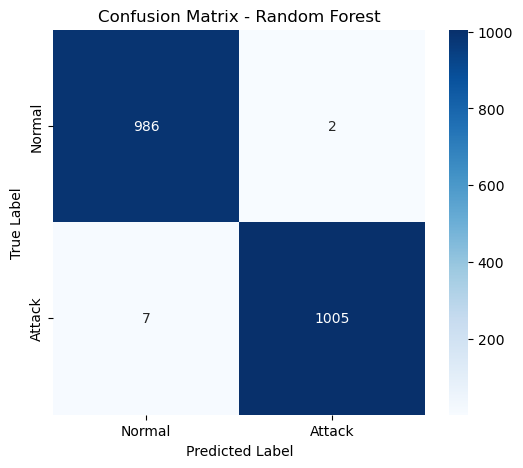

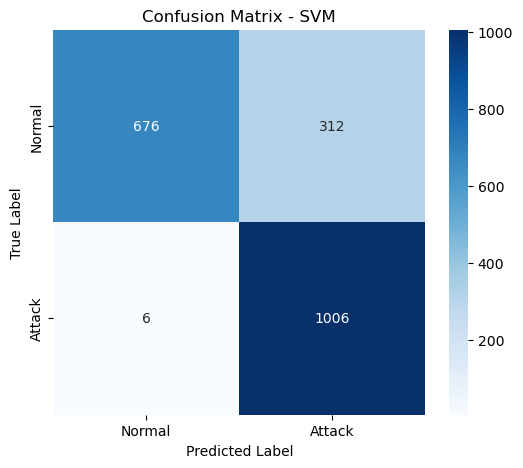

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot confusion matrices for both models
plot_confusion_matrix(y_test, rf_preds, "Random Forest")
plot_confusion_matrix(y_test, svm_preds, "SVM")


Saving the model

In [75]:
import joblib

# Save Random Forest model
joblib.dump(rf_model, "random_forest_model.pkl")

# Save SVM model
joblib.dump(svm_model, "svm_model.pkl")

print("Models saved successfully!")


Models saved successfully!
